In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import numpy as np 
cmap = sns.cm.rocket_r
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [3]:
from collections import defaultdict
people = {}

for i,person in enumerate(G.nodes()):
    people[i] = defaultdict(int)
    people[i]['age'] = G.nodes[person]['age']
    for n in G[person]:
        people[i][G.nodes[n]['age']] += 1


In [4]:
bins = list(range(0,70,5)) + [105]
labels = list(range(0,70,5))

In [21]:
def make_heatmap(people_dict, title, filename):
    df = pd.DataFrame.from_dict(people_dict).T.fillna(0)
    df = df.sort_values(by='age').reset_index(drop=True)
    df['age'] = pd.cut(df.age, bins=bins, labels=labels)
    df = df.set_index(df.age).drop('age', axis=1)
    df.columns = pd.cut(df.columns.to_list(), bins=bins, labels=labels)
    df = df.groupby(df.columns, axis=1).sum()
    df = df.groupby('age').mean()
    df = df.reindex(sorted(df.columns, reverse=True), axis=1).T
    df.rename(columns = {df.columns[-1]: str(df.columns[-1]) + '+'}, inplace=True)
    df.rename(index = {df.index[0]: str(df.index[0]) + '+'}, inplace=True)
    fig, ax = plt.subplots(figsize=(15,15))   
    sns.heatmap(df, annot=False, vmin=0, vmax=10, cmap=cmap, cbar=False, ax=ax, square=True, cbar_kws={"shrink": .6})
    plt.title(title, fontsize=60)
    #ax.set_ylabel('Age of Contact', fontsize=50)
    ax.set_xlabel('Age of Person', fontsize=50)
    ax.tick_params(labelsize=20)
    fig.tight_layout(pad=.3, h_pad=None, w_pad=None, rect=None)
    fig.savefig(f'{filename}.pdf')

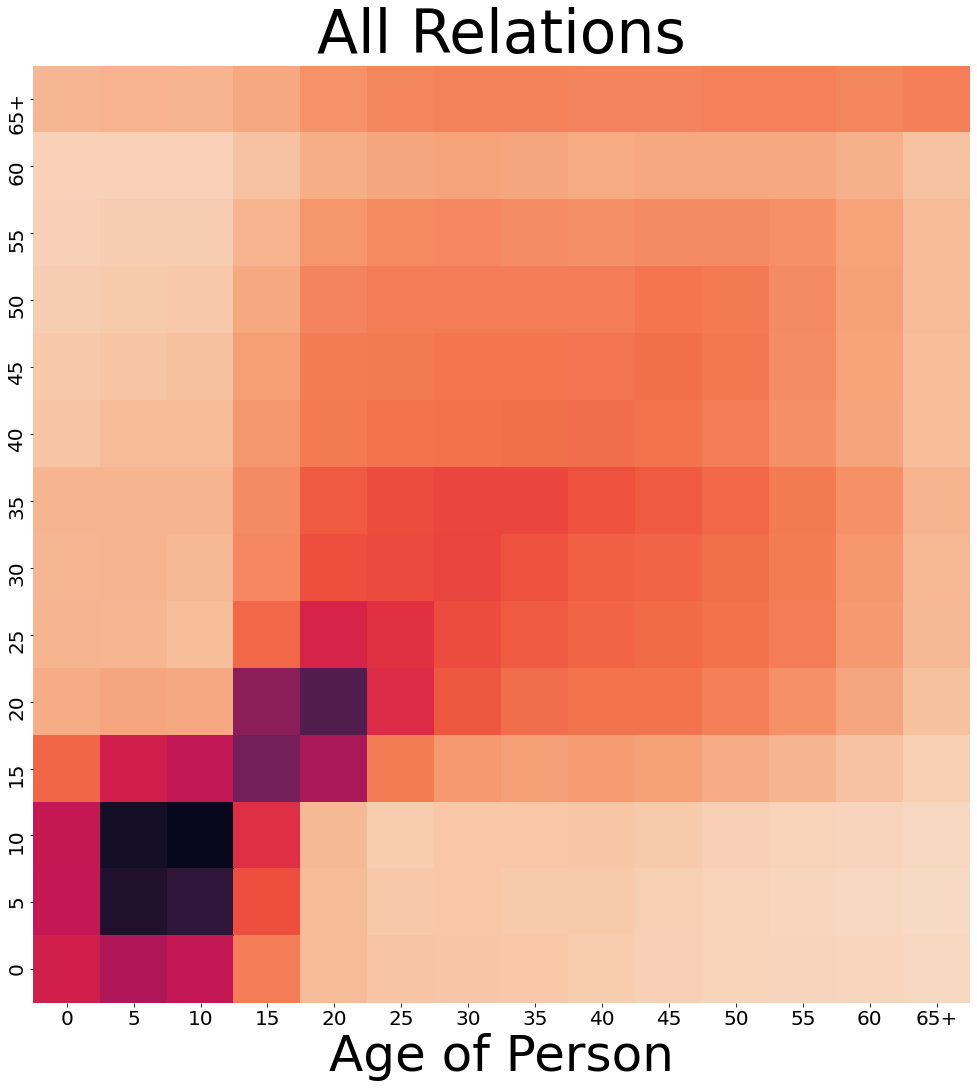

In [22]:
make_heatmap(people, 'All Relations', 'heatmap_age_all')

In [7]:
people_schools = {}

for i,person in enumerate(G.nodes()):
    people_schools[i] = defaultdict(int)
    people_schools[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'school':
            people_schools[i][G.nodes[y]['age']] += 1

In [8]:
np.unique([z['edge_type'] for x,y,z in G.edges(data=True)])

array(['home', 'neighbor', 'school', 'work'], dtype='<U8')

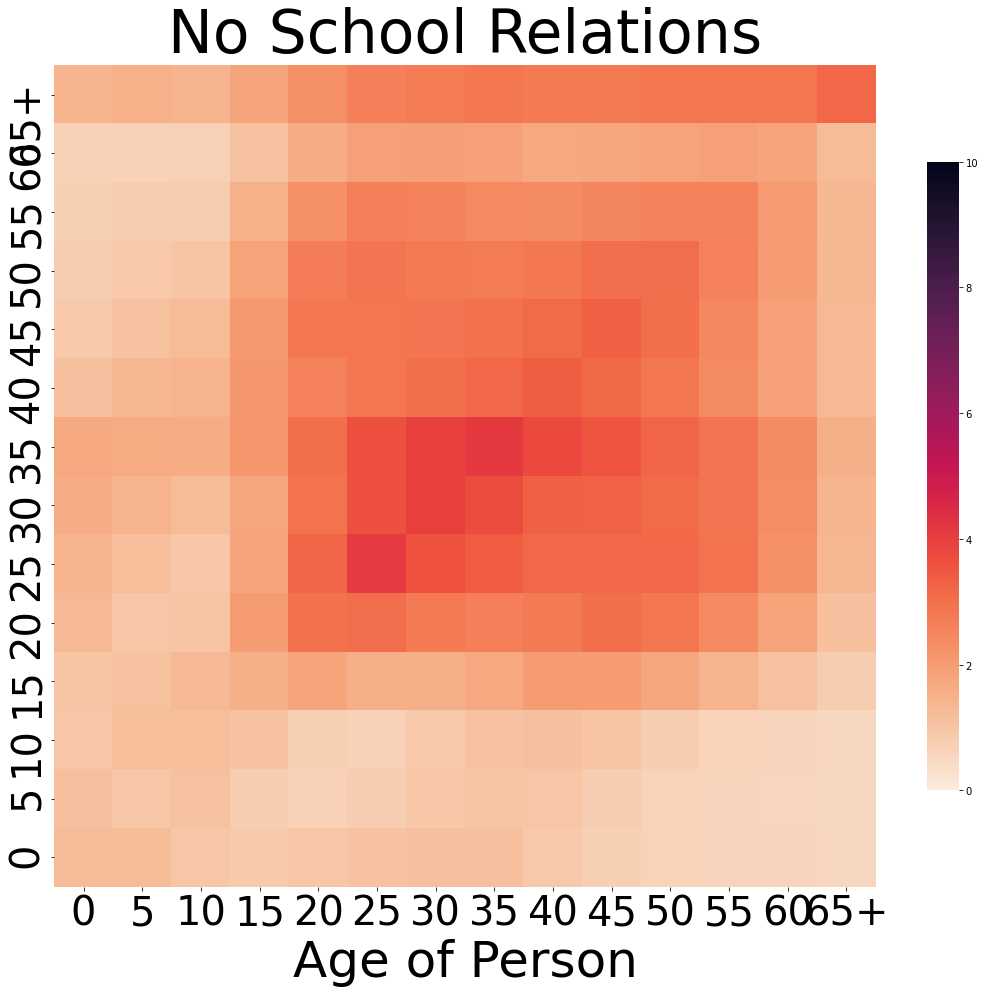

In [9]:
make_heatmap(people_schools, 'No School Relations', 'heatmap_age_schools')

In [10]:
people_work = {}

for i,person in enumerate(G.nodes()):
    people_work[i] = defaultdict(int)
    people_work[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'work':
            people_work[i][G.nodes[y]['age']] += 1

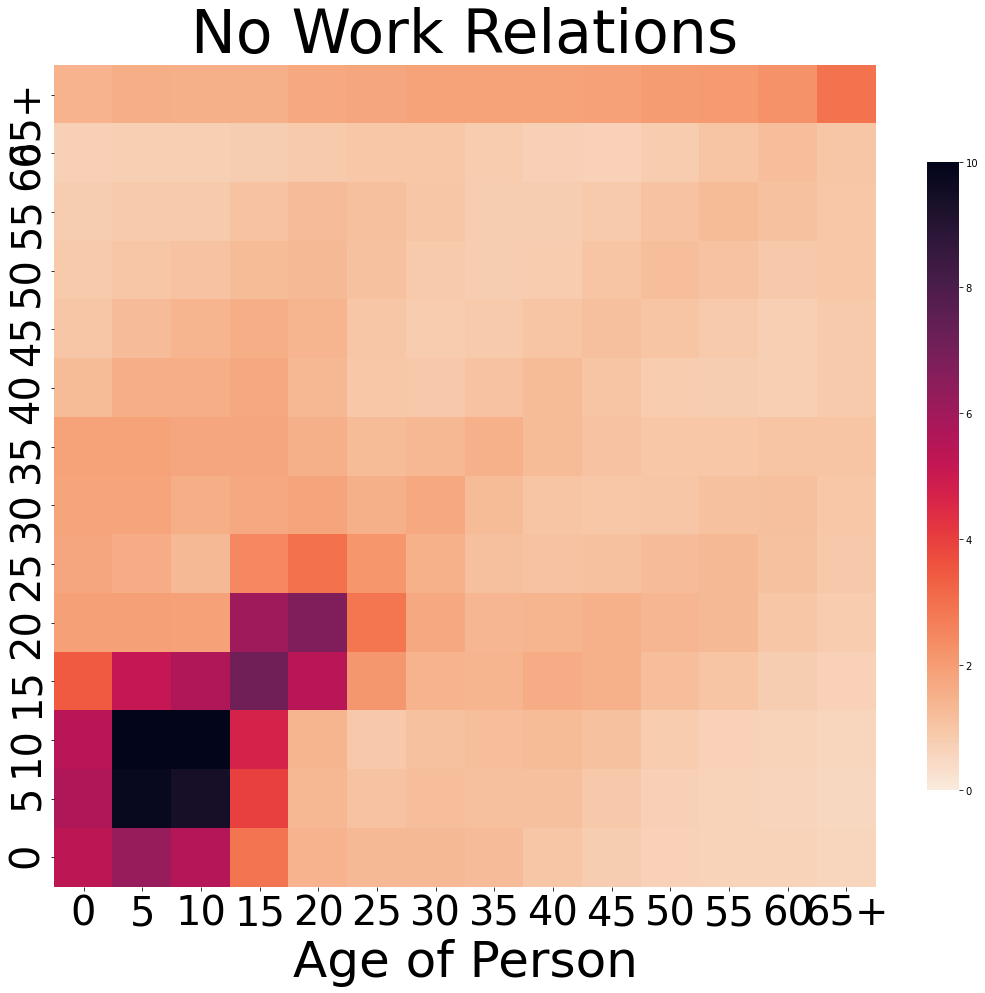

In [11]:
make_heatmap(people_work, 'No Work Relations', 'heatmap_age_work')

In [12]:
people_neigh = {}

for i,person in enumerate(G.nodes()):
    people_neigh[i] = defaultdict(int)
    people_neigh[i]['age'] = G.nodes[person]['age']
    for x,y,values in G.edges(person, data=True):
        if values['edge_type'] != 'work' and values['edge_type'] != 'school':
            people_neigh[i][G.nodes[y]['age']] += 1

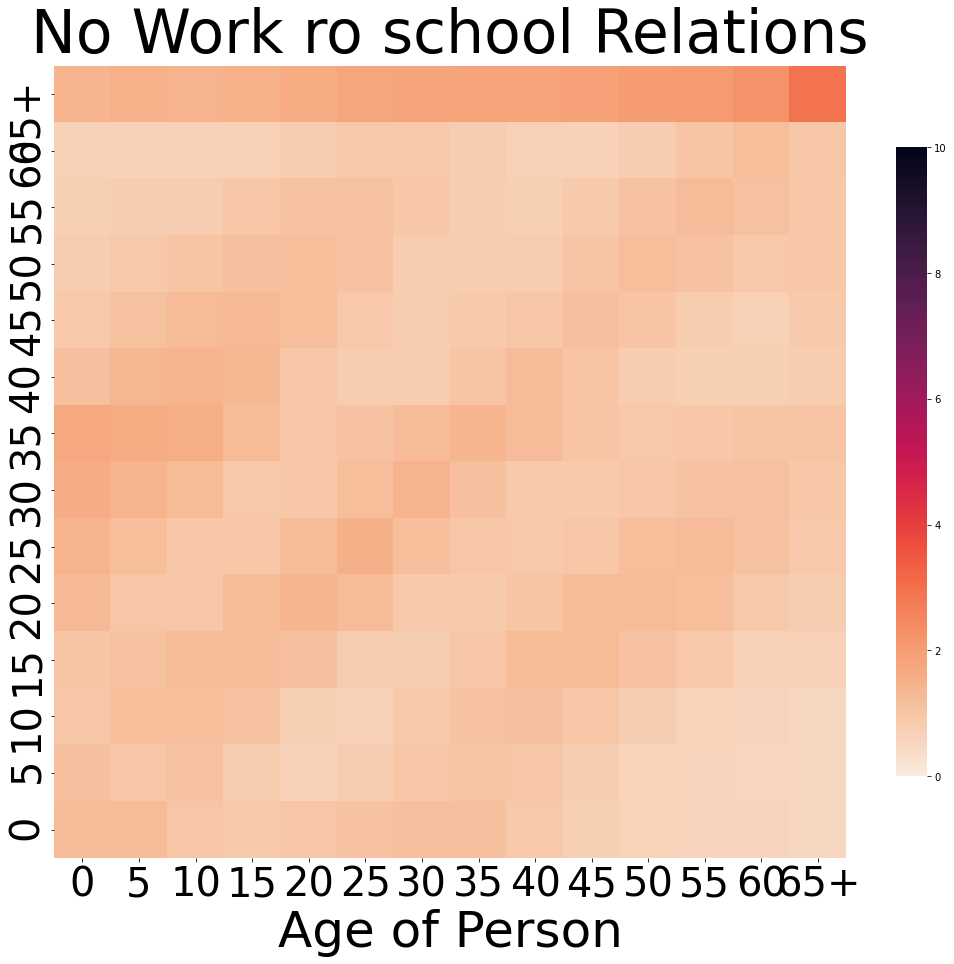

In [13]:
make_heatmap(people_neigh, 'No Work ro school Relations', 'heatmap_age_neighborhood')

In [14]:
for z in range(1,340):
    l = [(x,y,()) for x,y,v in G.edges(data=True) if v['edge_type'] == 'work' and v['zone'] == z]
    print(len(l))

3794
3282
1572
1362
4285
1930
2043
1030
983
577
532
1795
1073
2567
811
1364
1163
1266
1130
741
899
699
1241
1196
686
729
2829
2287


KeyboardInterrupt: 

In [ ]:
edges = [(x,y,()) for x,y,v in G.edges(data=True) if v['edge_type'] == 'work' and v['zone'] == 1]
s = nx.MultiGraph(edges)

In [ ]:
s.nodes()

In [ ]:
nx.write_gml(nx.relabel_nodes(s, lambda x: str(x)), 'subgraph_work.gml')


In [ ]:
import json
with open('work_subgraph.json', 'w') as f:
    f.write(json.dumps(nx.cytoscape_data(nx.relabel_nodes(s, lambda x: str(x)))))


In [ ]:
nx.draw(nx.relabel_nodes(s, lambda x: str(x)), node_size=15)